In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

wrking_dir_weak = "exp_scaling/weak/"
wrking_dir_strong = "exp_scaling/strong/"



plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)

plt.rcParams.update({'font.weight': 'bold'})

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 13}


SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 17

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



#plt.rc('font', **font)

In [2]:
def prepare_datasets(filename,wrking_dir):
    df = pd.read_csv(wrking_dir + filename,header=None)
    df.rename(columns={df.columns[0]:'Q_N_TS_TD',df.columns[1]:'Qubits',df.columns[2]:'NumProcs',
                       df.columns[3]:'Time (single prec)',df.columns[4]:'Time (double prec)'},inplace=True)
    df.drop('Q_N_TS_TD',axis=1,inplace=True)
    df.sort_values('NumProcs',axis=0,inplace=True)
    df['NumProcs'] = 2*df['NumProcs']
    return df
    

In [3]:
time_weak = prepare_datasets('times.out',wrking_dir_weak)
time_strong = prepare_datasets('times.out',wrking_dir_strong)

In [4]:
time_weak

,Qubits,NumProcs,Time (single prec),Time (double prec)
0,28,2,68.010002,108.430000
1,29,4,71.019997,121.169998
2,30,8,79.639999,137.100006
3,31,16,81.980003,154.500000
4,32,32,86.360001,175.529999
5,33,64,93.519997,199.240005
6,34,128,101.860001,222.110001


In [5]:
time_strong

,Qubits,NumProcs,Time (single prec),Time (double prec)
3,28,2,69.17,108.99
4,28,4,36.27,60.54
5,28,8,19.05,33.62
6,28,16,10.34,20.86
0,28,32,5.05,9.77
1,28,64,4.27,6.35
2,28,128,2.54,5.10


In [9]:
from matplotlib.font_manager import FontProperties
    
def make_barplots(df1, t1='Time (single prec)',t2='Time (double prec)',save_as = None, y_axisLabel='Time (seconds)'):
    # Setting the positions and width for the bars
    pos = list(range(len(df1[t1]))) 
    width = 0.35 

    # Plotting the bars
    fig, ax = plt.subplots(figsize=(10,5))

    # Create a bar with ACP_Only df1 data,
    # in position pos,
    plt.bar(pos, 
            #using df['pre_score'] data,
            df1[t1], 
            # of width
            width, 
            # with alpha 0.5
            alpha=0.5, 
            # with color
            color='#EE3224', 
            # with label the first value in first_name
            label="Speedup (single precision)"
           ) 

    # Create a bar with ACP_Only data df2,
    # in position pos + some width buffer,
    plt.bar([p + width for p in pos], 
            #using df['mid_score'] data,
            df1[t2],
            # of width
            width, 
            # with alpha 0.5
            alpha=0.5, 
            # with color
            color='#F78F1E', 
            # with label the second value in first_name
            label="Speedup (single precision)"
           ) 


    # Set the y axis label
    ax.set_ylabel(y_axisLabel)
    ax.set_xlabel('Number of Processes')

    # Set the chart's title
    ax.set_title('Speedup for Double and Single Precision',fontsize=BIGGER_SIZE)

    # Set the position of the x ticks
    ax.set_xticks([p + .5 * width for p in pos])

    # Set the labels for the x ticks
    ax.set_xticklabels(df1['NumProcs'])

    # Setting the x-axis and y-axis limits
    plt.xlim(min(pos)-width, max(pos)+width*4)
    #plt.ylim([0, max(df1['ACP_Only'] , df2['ACP_Only'])] )
    
    

    # Adding the legend and showing the plot
    plt.legend([t1 ,t2], loc='upper left')
    
    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])

    
    # Put a legend below current axis
    ax.legend(["Speedup (single precision)","Speedup (double precision)"],loc='upper center', bbox_to_anchor=(0.5, -0.18),
              fancybox=True, shadow=True, ncol=5)    
    plt.grid()

    
    if save_as is not None:
        plt.savefig( save_as)
        
    plt.show()

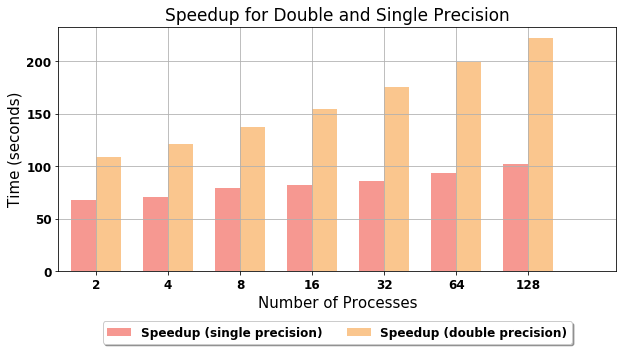

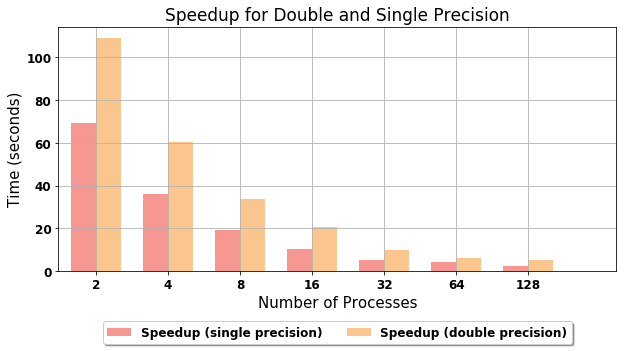

In [10]:
make_barplots(time_weak, save_as="scaling_weak.png")
make_barplots(time_strong, save_as="scaling_strong.png")

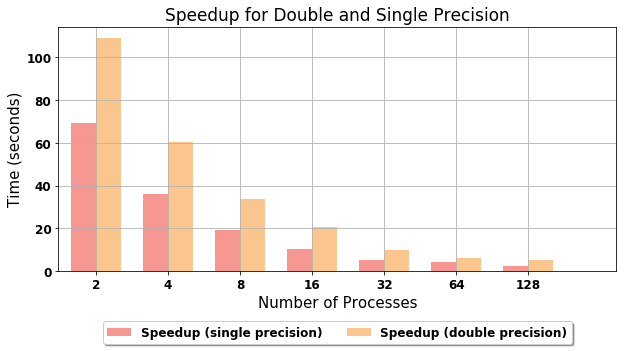

In [11]:
make_barplots(time_strong, save_as="scaling_strong.png")

In [65]:
from matplotlib.font_manager import FontProperties
    
def make_plots(df1,x='NumProcs', t1='Time (single prec)',t2='Time (double prec)',save_as = None):

    # Plotting the bars
    fig, ax = plt.subplots(figsize=(8,5))

    # Create a bar with ACP_Only df1 data,
    # in position pos,
    plt.plot(df1[x],
            #using df['pre_score'] data,
            df1[t1], 
            # with color
            color='#EE3224', 
            # with label the first value in first_name
            label=t1
           ) 

    # Create a bar with ACP_Only data df2,
    # in position pos + some width buffer,
    plt.plot(
            df1[x],
            #using df['mid_score'] data,
            df1[t2],
            # with color
            color='#F78F1E', 
            # with label the second value in first_name
            label=t2
           ) 


    # Set the y axis label
    ax.set_ylabel('Time (seconds)')
    ax.set_xlabel('Number of Processes')

    # Set the chart's title
    ax.set_title('Execution Time for Double and Single Precision',fontsize=BIGGER_SIZE)
    

    # Adding the legend and showing the plot
    plt.legend([t1 ,t2], loc='upper left')
    
    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])


    plt.xticks(((df1[x].values).astype(float)))
    
    # Put a legend below current axis
    ax.legend([t1,t2],loc='upper center', bbox_to_anchor=(0.5, -0.18),
              fancybox=True, shadow=True, ncol=5)    
    plt.grid()

    
    if save_as is not None:
        plt.savefig( save_as)
        
    plt.show()

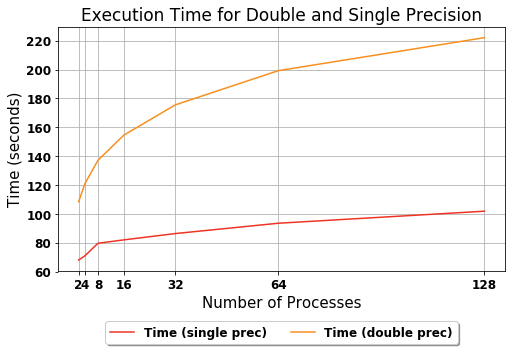

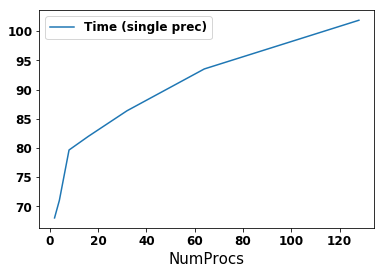

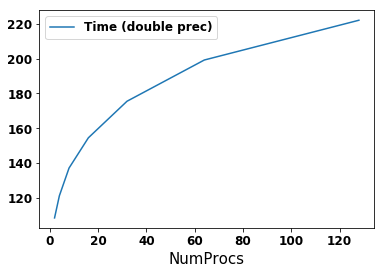

In [66]:
make_plots(time_weak, save_as="scaling_weak_.png")
time_weak.plot.line(x="NumProcs",y='Time (single prec)')
time_weak.plot.line(x="NumProcs",y='Time (double prec)')

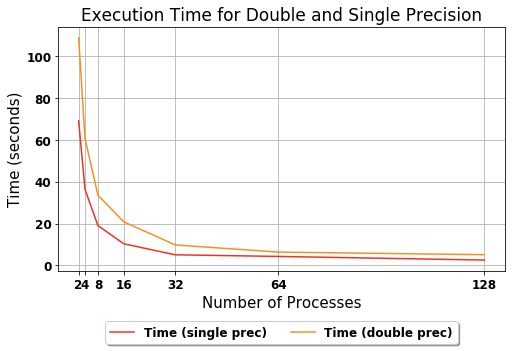

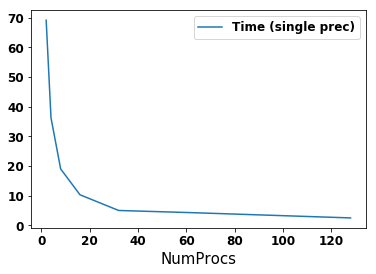

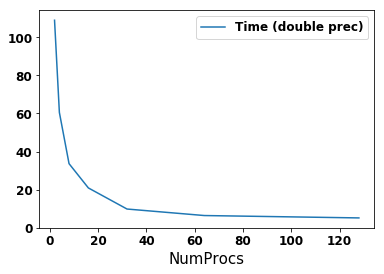

In [67]:
make_plots(time_strong, save_as="scaling_strong_.png")
time_strong.plot.line(x="NumProcs",y='Time (single prec)')
time_strong.plot.line(x="NumProcs",y='Time (double prec)')

In [58]:
time_weak['Time (single prec)'].loc[0]

68.010002

In [139]:
speedup_weak = time_weak.copy()
speedup_weak['Time (single prec)'] = speedup_weak['Time (single prec)'].loc[0] / speedup_weak['Time (single prec)']
speedup_weak['Time (double prec)'] = speedup_weak['Time (double prec)'].loc[0] / speedup_weak['Time (double prec)']

speedup_strong = time_strong.reset_index(drop = True).copy()
speedup_strong['Time (single prec)'] = speedup_strong['Time (single prec)'].loc[0] / speedup_strong['Time (single prec)']
speedup_strong['Time (double prec)'] = speedup_strong['Time (double prec)'].loc[0] / speedup_strong['Time (double prec)']

In [140]:
time_strong.reset_index(drop = True)

,Qubits,NumProcs,Time (single prec),Time (double prec)
0,28,2,69.17,108.99
1,28,4,36.27,60.54
2,28,8,19.05,33.62
3,28,16,10.34,20.86
4,28,32,5.05,9.77
5,28,64,4.27,6.35
6,28,128,2.54,5.10


In [141]:
speedup_strong

,Qubits,NumProcs,Time (single prec),Time (double prec)
0,28,2,1.000000,1.000000
1,28,4,1.907086,1.800297
2,28,8,3.630971,3.241820
3,28,16,6.689555,5.224832
4,28,32,13.697030,11.155578
5,28,64,16.199063,17.163780
6,28,128,27.232283,21.370588


In [142]:
speedup_weak

,Qubits,NumProcs,Time (single prec),Time (double prec)
0,28,2,1.000000,1.000000
1,29,4,0.957618,0.894858
2,30,8,0.853968,0.790883
3,31,16,0.829593,0.701812
4,32,32,0.787517,0.617729
5,33,64,0.727224,0.544218
6,34,128,0.667681,0.488182


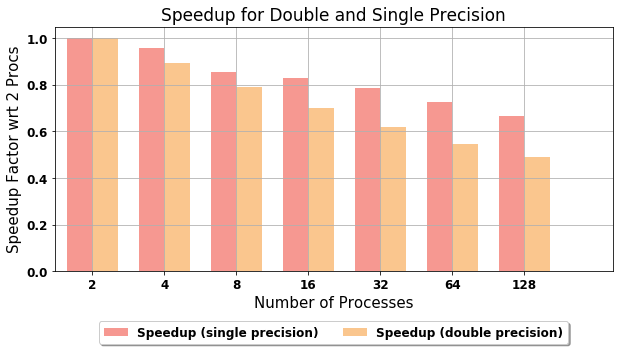

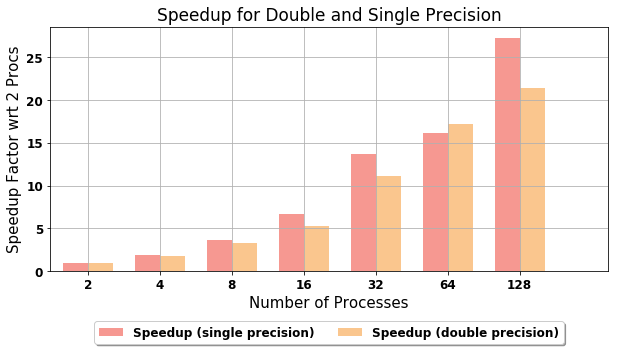

In [143]:
make_barplots(speedup_weak, save_as="scaling_speedup_weak.png",y_axisLabel = 'Speedup Factor wrt 2 Procs')
make_barplots(speedup_strong, save_as="scaling_speedup_strong.png", y_axisLabel = 'Speedup Factor wrt 2 Procs')